In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Baca dataset
dataset_train = pd.read_csv('dataset/train.csv')
dataset_test = pd.read_csv('dataset/test.csv')

# Salin dataset agar tidak merusak data asli
df_train = dataset_train.copy()
df_test = dataset_test.copy()

# Data Cleaning
# Konversi fitur kategorikal menjadi numerik menggunakan LabelEncoder
label_encoders = {}
for column in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le

# Pisahkan fitur dan target
X = df_train.drop(['sehat','id'], axis=1)
y = df_train['sehat']

# Bagi data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0., random_state=42)

# List untuk menyimpan model
models = {}

# Fungsi untuk melatih dan mengevaluasi model
def train_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"Classification Report {name}:")
    print(classification_report(y_val, y_pred))
    models[name] = model

# Model Prediksi
models_to_train = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models_to_train.items():
    print(f"\nTraining {name}...")
    train_model(model, name)



Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8238930659983291
Classification Report Gradient Boosting:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2247
           1       0.84      0.88      0.86      3738

    accuracy                           0.82      5985
   macro avg       0.82      0.80      0.81      5985
weighted avg       0.82      0.82      0.82      5985


Training Random Forest...
Random Forest Accuracy: 0.8105263157894737
Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2247
           1       0.84      0.87      0.85      3738

    accuracy                           0.81      5985
   macro avg       0.80      0.79      0.80      5985
weighted avg       0.81      0.81      0.81      5985


Training Decision Tree...
Decision Tree Accuracy: 0.7685881370091896
Classification Report Decision Tree:
             

C:\Users\Lenovo\scoop\apps\python311\current\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\scoop\apps\python311\current\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8076858813700919
Classification Report AdaBoost:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73      2247
           1       0.82      0.89      0.85      3738

    accuracy                           0.81      5985
   macro avg       0.80      0.78      0.79      5985
weighted avg       0.81      0.81      0.80      5985


Training Naive Bayes...
Naive Bayes Accuracy: 0.6962406015037594
Classification Report Naive Bayes:
              precision    recall  f1-score   support

           0       0.63      0.46      0.53      2247
           1       0.72      0.84      0.78      3738

    accuracy                           0.70      5985
   macro avg       0.68      0.65      0.65      5985
weighted avg       0.69      0.70      0.68      5985



In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Baca dataset
dataset_train = pd.read_csv('dataset/train.csv')
dataset_test = pd.read_csv('dataset/test.csv')

# Salin dataset agar tidak merusak data asli
df_train = dataset_train.copy()
df_test = dataset_test.copy()

# Data Cleaning
# Konversi fitur kategorikal menjadi numerik menggunakan LabelEncoder
label_encoders = {}
for column in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le

# Pisahkan fitur dan target
X = df_train.drop(['sehat','id'], axis=1)
y = df_train['sehat']

# Bagi data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk melatih dan mengevaluasi model
def train_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"Classification Report {name}:")
    print(classification_report(y_val, y_pred))

# Model Prediksi
models_to_train = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in models_to_train.items():
    print(f"\nTraining {name}...")
    train_model(model, name)



Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8208020050125313
Classification Report Gradient Boosting:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1512
           1       0.83      0.89      0.86      2478

    accuracy                           0.82      3990
   macro avg       0.82      0.80      0.80      3990
weighted avg       0.82      0.82      0.82      3990


Training Random Forest...
Random Forest Accuracy: 0.8105263157894737
Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1512
           1       0.83      0.87      0.85      2478

    accuracy                           0.81      3990
   macro avg       0.80      0.79      0.80      3990
weighted avg       0.81      0.81      0.81      3990


Training Decision Tree...
Decision Tree Accuracy: 0.7669172932330827
Classification Report Decision Tree:
             

C:\Users\Lenovo\scoop\apps\python311\current\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\scoop\apps\python311\current\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.7030075187969925
Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.47      0.55      1512
           1       0.72      0.84      0.78      2478

    accuracy                           0.70      3990
   macro avg       0.69      0.66      0.66      3990
weighted avg       0.70      0.70      0.69      3990


Training AdaBoost...
AdaBoost Accuracy: 0.8027568922305764
Classification Report AdaBoost:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1512
           1       0.82      0.88      0.85      2478

    accuracy                           0.80      3990
   macro avg       0.80      0.78      0.78      3990
weighted avg       0.80      0.80      0.80      3990


Training Naive Bayes...
Naive Bayes Accuracy: 0.6947368421052632
Classification Report Naive Bayes:
              precision    recall  f1-score   support

      

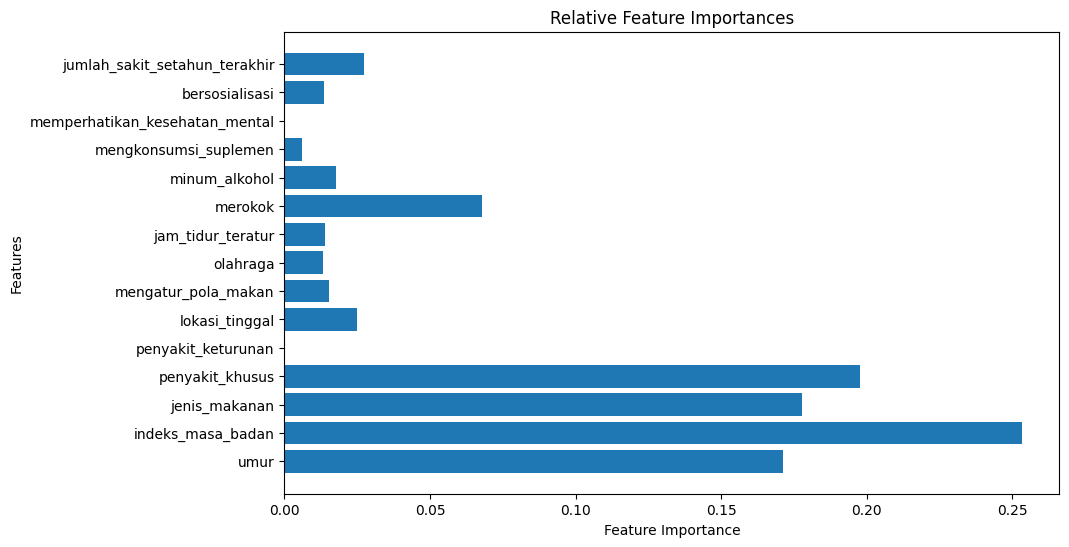

Selected Features: Index(['umur', 'indeks_masa_badan', 'jenis_makanan', 'penyakit_khusus',
       'merokok'],
      dtype='object')


In [15]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Akses atribut feature_importances_
feature_importances = rf_model.feature_importances_

# Visualisasi kontribusi fitur
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Relative Feature Importances')
plt.show()

# Seleksi fitur (misalnya, ambil fitur-fitur dengan kontribusi lebih dari ambang batas tertentu)
selected_features = X.columns[feature_importances > 0.05]  # contoh ambang batas 0.05
print("Selected Features:", selected_features)

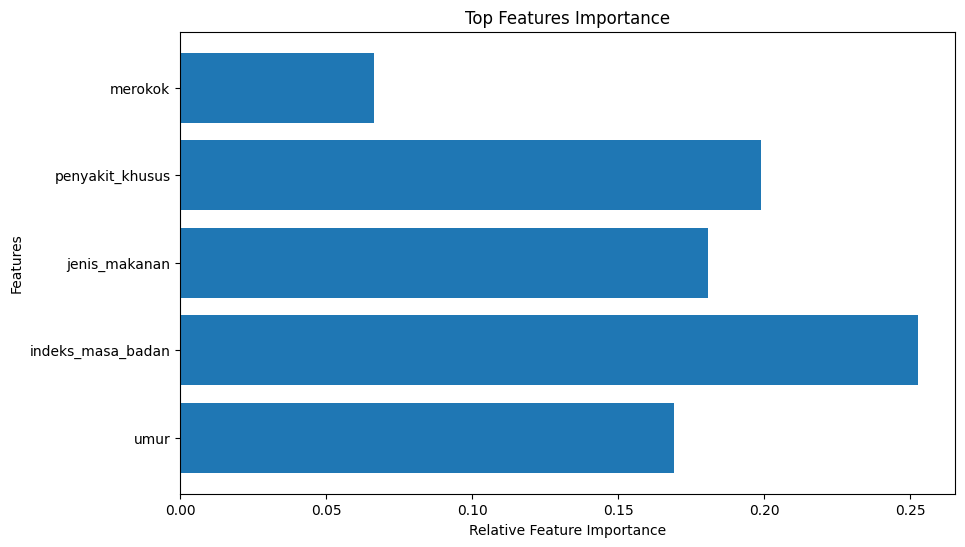

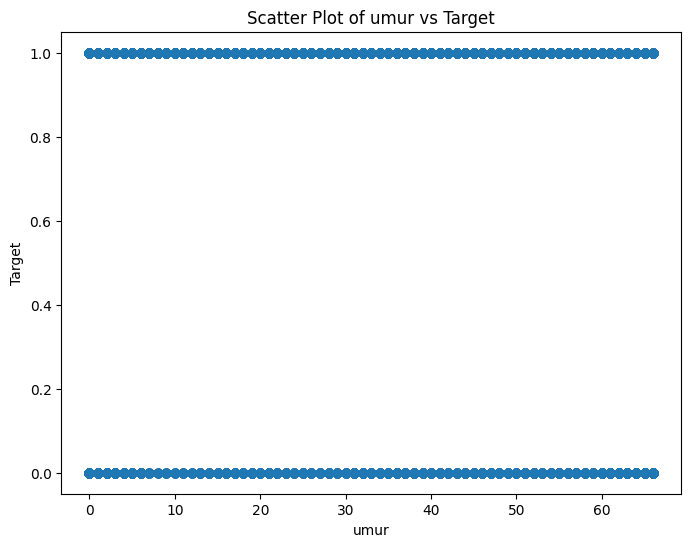

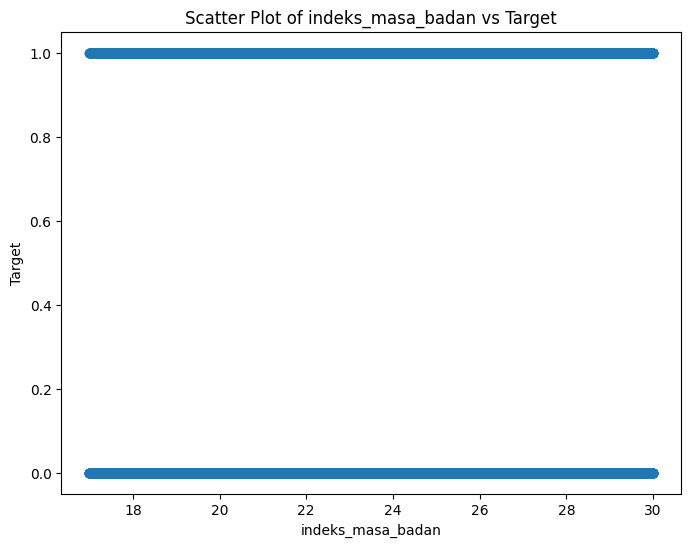

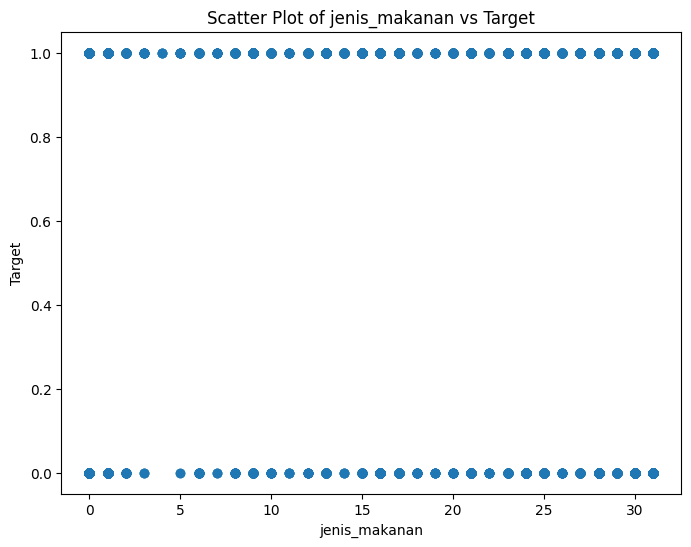

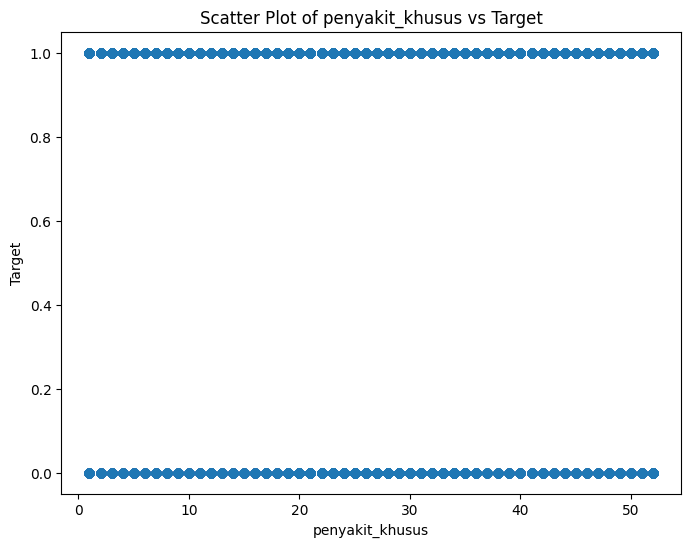

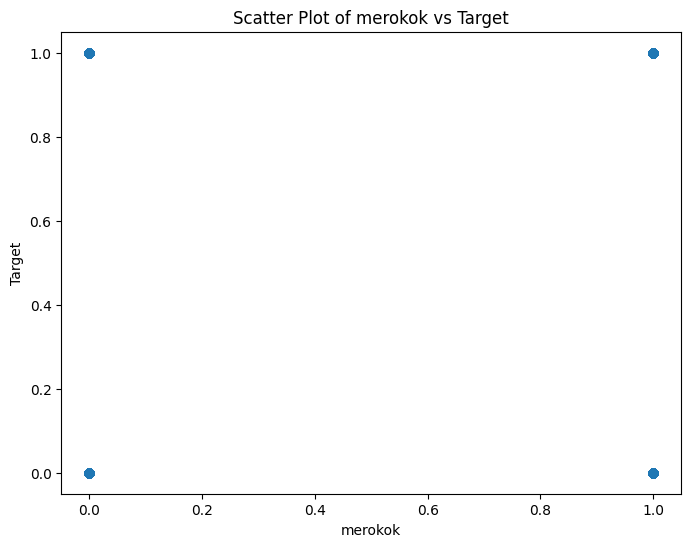

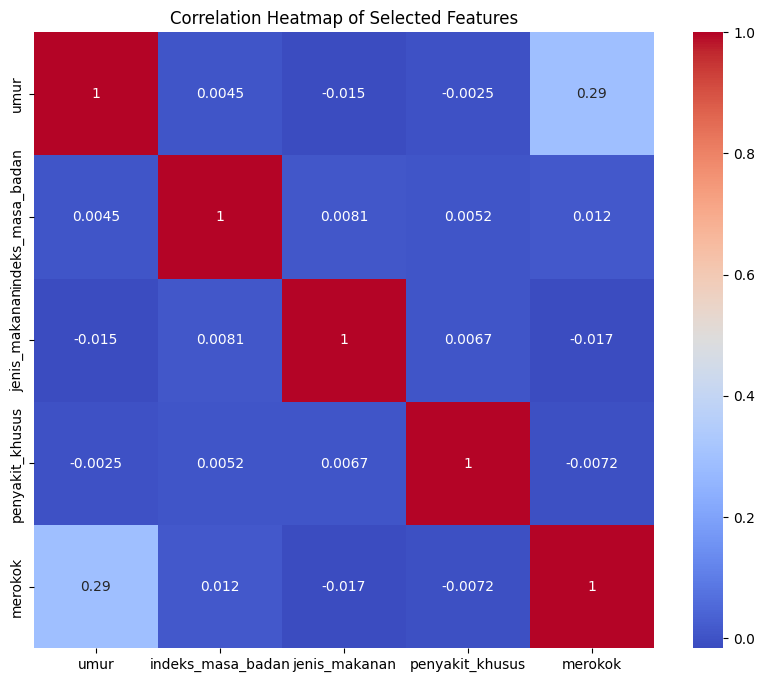

In [18]:
import seaborn as sns

# Visualisasi Fitur Penting
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances[feature_importances > 0.05])
plt.xlabel('Relative Feature Importance')
plt.ylabel('Features')
plt.title('Top Features Importance')
plt.show()

# Eksplorasi Hubungan
# Misalnya, plot scatter plot antara fitur-fitur penting dan target
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'Scatter Plot of {feature} vs Target')
    plt.show()

# Analisis Korelasi
correlation_matrix = X[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# Feature Engineering
# Jika diperlukan, lakukan feature engineering berdasarkan fitur-fitur penting

# Seleksi Fitur
# Jika ada fitur-fitur yang kurang penting, Anda dapat menghapusnya dari dataset

# Validasi dan Penyetelan
# Uji kembali model Anda setelah mengambil tindakan berdasarkan analisis fitur penting


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# pip install imbalanced-learn

# Baca dataset
dataset_train = pd.read_csv('dataset/train.csv')
dataset_test = pd.read_csv('dataset/test.csv')

# Salin dataset agar tidak merusak data asli
df_train = dataset_train.copy()
df_test = dataset_test.copy()

# Data Cleaning
# Konversi fitur kategorikal menjadi numerik menggunakan LabelEncoder
label_encoders = {}
for column in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le

# Pisahkan fitur dan target
X = df_train.drop(['sehat','id'], axis=1)
y = df_train['sehat']

# Bagi data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Penanganan Ketidakseimbangan Kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Pemrosesan Lebih Lanjut dengan Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Penyetelan Hyperparameter dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2]
}
gb_model = GradientBoostingClassifier()
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_resampled)

# Model Prediksi
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train_scaled, y_train_resampled)
y_pred = best_gb_model.predict(X_val_scaled)

# Evaluasi Model
print("Gradient Boosting Accuracy after Improvement:")
print(accuracy_score(y_val, y_pred))
print("Classification Report Gradient Boosting after Improvement:")
print(classification_report(y_val, y_pred))


Gradient Boosting Accuracy after Improvement:
0.8269005847953217
Classification Report Gradient Boosting after Improvement:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2247
           1       0.87      0.85      0.86      3738

    accuracy                           0.83      5985
   macro avg       0.81      0.82      0.82      5985
weighted avg       0.83      0.83      0.83      5985



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Baca dataset
df_train = pd.read_csv('dataset/train.csv')

# Data Cleaning
label_encoders = {}
for column in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le

# Pisahkan fitur dan target
X = df_train.drop('sehat', axis=1)
y = df_train['sehat']

# Bagi data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Penanganan Ketidakseimbangan Kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Pemrosesan Lebih Lanjut dengan Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Penyetelan Hyperparameter dengan RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2]
}
gb_model = GradientBoostingClassifier()
random_search = RandomizedSearchCV(gb_model, param_dist, cv=5, n_iter=10, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train_resampled)

# Model Prediksi
best_gb_model = random_search.best_estimator_
best_gb_model.fit(X_train_scaled, y_train_resampled)
y_pred = best_gb_model.predict(X_val_scaled)

# Evaluasi Model
print("Gradient Boosting Accuracy after Improvement:")
print(accuracy_score(y_val, y_pred))
print("Classification Report Gradient Boosting after Improvement:")
print(classification_report(y_val, y_pred))


C:\Users\Lenovo\scoop\apps\python311\current\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Gradient Boosting Accuracy after Improvement:
0.8253968253968254
Classification Report Gradient Boosting after Improvement:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2247
           1       0.86      0.86      0.86      3738

    accuracy                           0.83      5985
   macro avg       0.81      0.82      0.81      5985
weighted avg       0.83      0.83      0.83      5985



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Baca dataset
df_train = pd.read_csv('dataset/train.csv')

# Data Cleaning
label_encoders = {}
for column in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le

# Pisahkan fitur dan target
X = df_train.drop('sehat', axis=1)
y = df_train['sehat']

# Bagi data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Penanganan Ketidakseimbangan Kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Pemrosesan Lebih Lanjut dengan Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Penyetelan Hyperparameter dengan RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_model = GradientBoostingClassifier()
random_search = RandomizedSearchCV(gb_model, param_dist, cv=5, n_iter=20, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train_resampled)

# Model Prediksi
best_gb_model = random_search.best_estimator_
best_gb_model.fit(X_train_scaled, y_train_resampled)
y_pred = best_gb_model.predict(X_val_scaled)

# Evaluasi Model
print("Gradient Boosting Accuracy after Further Improvement:")
print(accuracy_score(y_val, y_pred))
print("Classification Report Gradient Boosting after Further Improvement:")
print(classification_report(y_val, y_pred))


Gradient Boosting Accuracy after Further Improvement:
0.8235588972431078
Classification Report Gradient Boosting after Further Improvement:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2247
           1       0.86      0.86      0.86      3738

    accuracy                           0.82      5985
   macro avg       0.81      0.81      0.81      5985
weighted avg       0.82      0.82      0.82      5985



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Baca dataset
df_train = pd.read_csv('dataset/train.csv')

# Data Cleaning
label_encoders = {}
for column in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le

# Pisahkan fitur dan target
X = df_train.drop('sehat', axis=1)
y = df_train['sehat']

# Bagi data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Penanganan Ketidakseimbangan Kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Pemrosesan Lebih Lanjut dengan Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Penyetelan Hyperparameter dengan RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_model = RandomForestClassifier()
random_search = RandomizedSearchCV(rf_model, param_dist, cv=5, n_iter=20, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train_resampled)

# Model Prediksi
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train_resampled)
y_pred = best_rf_model.predict(X_val_scaled)

# Evaluasi Model
print("Random Forest Accuracy after Improvement:")
print(accuracy_score(y_val, y_pred))
print("Classification Report Random Forest after Improvement:")
print(classification_report(y_val, y_pred))


Random Forest Accuracy after Improvement:
0.8085213032581454
Classification Report Random Forest after Improvement:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2247
           1       0.85      0.84      0.84      3738

    accuracy                           0.81      5985
   macro avg       0.80      0.80      0.80      5985
weighted avg       0.81      0.81      0.81      5985

